<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/train/03_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2022-03-08 21:16:59--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 52.188.136.184
Connecting to api.worldbank.org (api.worldbank.org)|52.188.136.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195584 (191K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel’

SP.POP.TOTL?downloa 100%[===================>] 191.00K  --.-KB/s    in 0.06s   

2022-03-08 21:16:59 (3.15 MB/s) - ‘SP.POP.TOTL?downloadformat=excel’ saved [195584/195584]



In [36]:
import pylab as pl
import pandas as pd
from sklearn import preprocessing
from sklearn import cluster

In [5]:
cd content/drive/MyDrive/MLTSA22

[Errno 2] No such file or directory: 'content/drive/MyDrive/MLTSA22'
/content


In [10]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 4.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [13]:
pop_df = pd.read_excel('/content/drive/MyDrive/SP.POP.TOTL?downloadformat=excel', skiprows = 3, header = 0, usecols = [0] + list(range(4,100))).set_index('Country Name')

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [14]:
pop_df.shape

(266, 61)

In [19]:
pop_df_clean = pop_df.dropna(axis=1, how='all').dropna(axis=0,how='any')

In [20]:
pop_df_clean.shape

(262, 61)

Text(0, 0.5, 'pop')

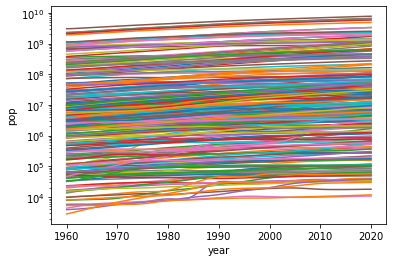

In [29]:
pop_df_clean.T.plot(legend=False, logy=True)
pl.xlabel('year')
pl.ylabel('pop')

In [32]:
x = preprocessing.scale(pop_df_clean, axis = 1) #standardize
x.shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


(262, 61)

In [35]:
x.std(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

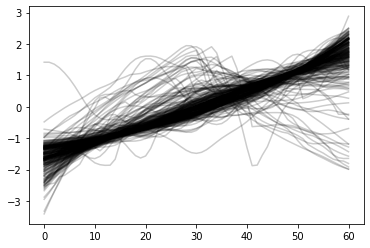

In [38]:
pl.plot(x.T, 'k',alpha = 0.2);

In [42]:
c = cluster.k_means(x, 4)

105

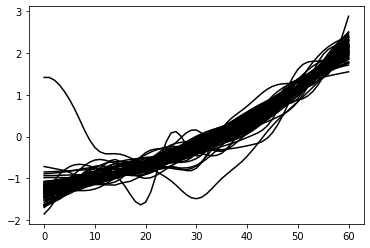

In [46]:
pl.plot(x[c[1]==0].T, 'k');
(c[1]==0).sum()

120

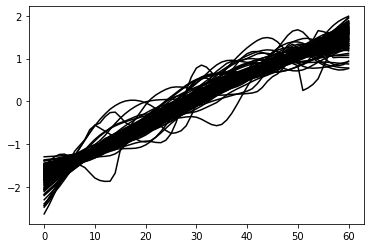

In [47]:
pl.plot(x[c[1]==2].T, 'k');
(c[1]==2).sum()

27

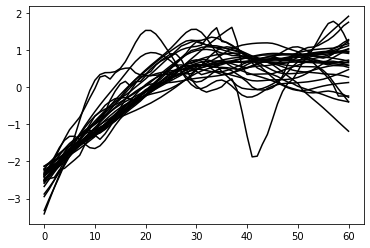

In [48]:
pl.plot(x[c[1]==3].T, 'k');
(c[1]==3).sum()